<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-team_59/blob/main/Sem_09_CD_Reto_entrega_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Actividad Reto 1:
## Limpieza, análisis y visualización

### Materia: Ciencia y analítica de datos
**Profesora: María de la Paz Rico Fdz.**

###Alumnos: 
**Andrea Margarita Osorio González** **A01104776**

**Fernando Alfredo Rojas Estrella** **A01685424**


---


**Limpieza, análisis, visualización y agrupamiento:**

En esta base de datos se encuentran

- Aguas subterraneas.
- Aguas superficiales.

  Elige una base de datos, ya sea la de aguas superficiales o la de aguas subterraneas.

1. Limpieza de base de datos. Explorar  cada datos (auxiliate de describe(), mean(), plot, boxplot de pandas):
Identificando tendencias centrales promedio, media y mediana de los datos. 
2. Identificar medidas de dispersión, máximo, mínimo .
3. Identificar medidas de posición no centrales , los cuartiles , outliers.   
4. Identificar correlaciones.
5. Preparar los datos 
6. Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.
7. Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.

---





---

# Extrayendo datos

---

In [1]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Módulos, librerías y paquetes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import copy as cp
from google.colab import drive
from google.colab.data_table import DataTable
from pandas.core.groupby import groupby

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Carga de información

# 1. Aguas superficiales.
# 2. Aguas subterraneas.

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
def abrir_archivo_(URL, modo):
  with open(URL, modo, encoding = "ISO-8859-1") as fichero:
      linea = fichero.readline()
      print('\n-----------------------------Abriendo archivo-----------------------------\n')
      while linea != '':
          print(linea, end='')
          linea = fichero.readline()
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

URL_nom_1= '/content/drive/MyDrive/Colab Notebooks/04 - TC4029 Ciencia y analítica de datos/Sem 09/Escalas_superficial.csv'
URL_nom_2= '/content/drive/MyDrive/Colab Notebooks/04 - TC4029 Ciencia y analítica de datos/Sem 09/Escalas_subterranea.csv'

URL_1= '/content/drive/MyDrive/Colab Notebooks/04 - TC4029 Ciencia y analítica de datos/Sem 09/-Sp_Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv'
URL_2= '/content/drive/MyDrive/Colab Notebooks/04 - TC4029 Ciencia y analítica de datos/Sem 09/-Sb_Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv'

URL_kmz_1= '/content/drive/MyDrive/Colab Notebooks/04 - TC4029 Ciencia y analítica de datos/Sem 09/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.kmz'
URL_kmz_2= '/content/drive/MyDrive/Colab Notebooks/04 - TC4029 Ciencia y analítica de datos/Sem 09/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.kmz'

df_1= pd.read_csv(URL_1, encoding= "ISO-8859-1")# , header= None, sep= ',')
df_2= pd.read_csv(URL_2, encoding= "ISO-8859-1")# , header= None, sep= ',')

---

# Carga de información: 1. Aguas superficiales

---

In [4]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Información: 1. Aguas superficiales

abrir_archivo_(URL_nom_1, 'r')


-----------------------------Abriendo archivo-----------------------------

CALIDAD DEL AGUA PARA TOXICIDAD,CRITERIO,DESCRIPCION
No t¢xico,TOX menor a 1,Agua no contaminada.Toxicidad no detectable.
Toxicidad baja,TOX mayor o igual a 1 y menor o igual a 1.33,Toxicidad baja
Toxicidad moderada,TOX mayor de 1.33 y menor a 5,Toxicidad moderada
Toxicidad alta,TOX mayor o igual a 5,Toxicidad alta
CALIDAD DEL AGUA PARA SST,CRITERIO ,DESCRIPCION
Excelente, SST menor o igual a 25,"Clase de excepci¢n, muy buena calidad."
Buena calidad, SST mayor de 25 y menor o igual a 75,"Aguas superficiales con bajo contenido de solidos suspendidos, generalmente condiciones naturales. Favorece la conservacion de comunidades acuaticas y el riego agricola irrestricto."
Aceptable, SST mayor de 75 y menor o igual a 150,Aguas superficiales con indicio de contaminacion. Con descargas de aguas residuales tratadas biologicamente. Condicion regular para peces. Riego agricola restringido.
Contaminada, SST mayor de 150 y

In [5]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Carga data frame: 1. Aguas superficiales. 

pd.set_option('display.width',25)
pd.set_option('max_columns',55)
print('\n--------------------------Abriendo el Data Frame--------------------------\n')
#print('1. Wisconsin Breast Cancer Database (January 8, 1991):\n')
display(df_1.head(2))

print('\n------------------------Describiendo el Data Frame------------------------\n')
display(df_1.describe())

print('\n------------------------Información del Data Frame------------------------\n')
display(df_1.info())


--------------------------Abriendo el Data Frame--------------------------



,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,LATITUD,PERIODO,DBO_mg/L,CALIDAD_DBO,DQO_mg/L,CALIDAD_DQO,SST_mg/L,CALIDAD_SST,COLI_FEC_NMP_100mL,CALIDAD_COLI_FEC,E_COLI_NMP_100mL,CALIDAD_E_COLI,ENTEROC_NMP_100mL,CALIDAD_ENTEROC,OD_PORC,CALIDAD_OD_PORC,OD_PORC_SUP,CALIDAD_OD_PORC_SUP,OD_PORC_MED,CALIDAD_OD_PORC_MED,OD_PORC_FON,CALIDAD_OD_PORC_FON,TOX_D_48_UT,CALIDAD_TOX_D_48,TOX_V_15_UT,CALIDAD_TOX_V_15,TOX_D_48_SUP_UT,CALIDAD TOX_D_48_SUP,TOX_D_48_FON_UT,CALIDAD_TOX_D_48_FON,TOX_FIS_SUP_15_UT,CALIDAD_TOX_FIS_SUP_15,TOX_FIS_FON_15_UT,CALIDAD_TOX_FIS_FON_15,SEMAFORO,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,22.24730,2020.0,6,Buena calidad,54.08,Contaminada,13.75,Excelente,1162,Contaminada,98,Excelente,NaN,NaN,NaN,NaN,46.8,Aceptable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,<1,No Toxico,NaN,NaN,Rojo,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,22.90473,2020.0,NaN,NaN,NaN,NaN,<10,Excelente,NaN,NaN,NaN,NaN,20,Excelente,NaN,NaN,92,Excelente,95.4,Excelente,92.2,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO



------------------------Describiendo el Data Frame------------------------



,LONGITUD,LATITUD,PERIODO,TOX_D_48_FON_UT,CALIDAD_TOX_D_48_FON,TOX_FIS_FON_15_UT,CALIDAD_TOX_FIS_FON_15
count,3493.000000,3493.000000,3493.0,0.0,0.0,0.0,0.0
mean,-100.359969,21.046992,2020.0,NaN,NaN,NaN,NaN
std,6.122773,3.893696,0.0,NaN,NaN,NaN,NaN
min,-117.124030,14.534910,2020.0,NaN,NaN,NaN,NaN
25%,-103.882310,18.396070,2020.0,NaN,NaN,NaN,NaN
50%,-99.795530,20.148980,2020.0,NaN,NaN,NaN,NaN
75%,-96.860230,22.828930,2020.0,NaN,NaN,NaN,NaN
max,-86.732150,32.706500,2020.0,NaN,NaN,NaN,NaN



------------------------Información del Data Frame------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLAVE                   3493 non-null   object 
 1   SITIO                   3493 non-null   object 
 2   ORGANISMO_DE_CUENCA     3493 non-null   object 
 3   ESTADO                  3493 non-null   object 
 4   MUNICIPIO               3493 non-null   object 
 5   CUENCA                  3492 non-null   object 
 6   CUERPO DE AGUA          3479 non-null   object 
 7   TIPO                    3493 non-null   object 
 8   SUBTIPO                 3479 non-null   object 
 9   LONGITUD                3493 non-null   float64
 10  LATITUD                 3493 non-null   float64
 11  PERIODO                 3493 non-null   float64
 12  DBO_mg/L                2581 non-null   object 
 13  CALIDAD_DBO     

None

---

# Carga de información: 2. Aguas subterraneas

---

In [6]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Información: 2. Aguas subterraneas

abrir_archivo_(URL_nom_2, 'r')


-----------------------------Abriendo archivo-----------------------------

CALIDAD DEL AGUA PARA COLIFORMES FECALES_subterraneas,CRITERIO,DESCRIPCION
Excelente,COLI_FEC menor a 1.1,Agua potable. Agua no contaminada o condicion normal. No hay evidencia de alteracion en los valores de la calidad bacteriologica para el cuerpo de agua subterraneo
Buena calidad,COLI_FEC mayor o igual de 1.1 y menor o igual a 200,"Aguas para uso recreativo con contacto primario, as¡ como para otros usos. Indicios de alteracion de la calidad bacteriologica"
Aceptable,COLI_FEC mayor de 200 y menor o igual a 1000,Aguas con calidad admisible como fuente de abastecimiento de agua potable y para riego agricola. Muestra bajos niveles de alteracion como resultado de la actividad humana
Contaminada,COLI_FEC mayor de 1000 y menor o igual a 10000,Aguas  con contaminacion bacteriologica. Indica alteracion substancial con respecto a la condicion normal
Fuertemente contaminada,COLI_FEC mayor de 10000,Aguas con fuerte co

In [7]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Carga data frame: 2. Aguas subterraneas.

pd.set_option('display.width',25)
pd.set_option('max_columns',55)
print('\n--------------------------Abriendo el Data Frame--------------------------\n')
#print('1. Wisconsin Breast Cancer Database (January 8, 1991):\n')
display(df_2.head(2))

print('\n------------------------Describiendo el Data Frame------------------------\n')
display(df_2.describe())

print('\n------------------------Información del Data Frame------------------------\n')
display(df_2.info())


--------------------------Abriendo el Data Frame--------------------------



,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,...,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.99,Alta,940.0,Permisible para riego,NaN,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,...,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.99,Alta,608.0,Buena para riego,NaN,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,...,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI



------------------------Describiendo el Data Frame------------------------



,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L
count,1068.000000,1068.000000,1068.0,1064.000000,1062.000000,0.0
mean,-101.891007,23.163618,2020.0,235.633759,1138.953013,NaN
std,6.703263,3.887670,0.0,116.874291,1245.563674,NaN
min,-116.664250,14.561150,2020.0,26.640000,50.400000,NaN
25%,-105.388865,20.212055,2020.0,164.000000,501.750000,NaN
50%,-102.174180,22.617190,2020.0,215.527500,815.000000,NaN
75%,-98.974716,25.510285,2020.0,292.710000,1322.750000,NaN
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,NaN



------------------------Información del Data Frame------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 


None

---

# Funciones utilizadas

---

In [19]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Funciones para entendimiento de los datos

# - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Limpia los datos eliminando los registros nulos o rellena con la media de la columna
def Busca_Nulos_(data_frame, accion): # Función que ayuda a identificar columnas con valores nulos
  data_frame= data_frame.replace(['SIN DATOS','N/A', 0, ''],np . nan)
  if data_frame.isnull().values.any():          # Buscando nulos
    print('\n------------------Búscando y borrando nulos en data frame-----------------\n')
    print('El data frame SÍ tiene nulos')     # Desechamos los valores NaN
    names_columns= data_frame.columns.values
    for name in names_columns:
      if data_frame[name].isnull().values.any():
        print('Se encuentran\t',data_frame[name].isnull().sum(),'\tnulos en la columna: ',name, 'antes del borrado')
        if accion == 'delete':
          data_frame.dropna(subset=[name], inplace=True)
          print('Se encuentran\t', data_frame[name].isnull().sum(),'\tnulos en la columna: ',name, 'después de borrarlos')
        elif accion == 'mean':
          mean= data_frame[name].mean()
          print('\nVal:',mean)
          for i in range(len(data_frame)):
            if data_frame.iloc[i].empty: data_frame.iloc[i][name]=val
            #print(val)
          print('Se encuentran\t', data_frame[name].isnull().sum(),'\tnulos en la columna: ',name, 'después de imputarlos con la media')
        else:
          None
      else:
        None
  else:
    print('\n------------------------El data frame NO tiene nulos----------------------\n')
  print('\nSe procedió al borrado de nulos en el data set\n¿Se encuentran nulos en el data set?: ',data_frame.isnull().values.any())
  print('\n-----------------------------Fin de la función----------------------------\n')

  return data_frame
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
def Busca_Nulos (data_frame): # Función que ayuda a identificar columnas con valores nulos
  data_frame = data_frame.replace(['SIN DATOS','N/A', 0, ''],np . nan)
  if data_frame.isnull().values.any():          # Buscando nulos
    print('\n-----------------------Búscando nulos en data frame-----------------------\n')
    print('El data frame SÍ tiene nulos')     # Desechamos los valores NaN
    names_columns= data_frame.columns.values
    for name in names_columns:
      if data_frame[name].isnull().values.any():
        print('Se encuentran\t',data_frame[name].isnull().sum(),'\tnulos en la columna: ',name)
      else:
        None
  else:
    print('\n------------------------El data frame NO tiene nulos----------------------\n')
  print('\n-----------------------------Fin de la función----------------------------\n')

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
def Visualiza_hist(datos_, bins_): # Función que sirve para gráficar columnas del data frame
  nombres= datos_.columns
  n= len(nombres)
  print('-------------------------------------\n# de gráficos:',n)
  nr= int(n/5)+1
  round(nr,0)
  nc = int(n/nr)
  if nc== 0:
    nc= n
  else:
    if nr*nc<n:
      nc=nc+1
  print('Renglones:',nr,', columnas:',nc)  
  sns.set(rc={'figure.figsize':(nc*5,nr*5)})
  fig, axes = plt.subplots(nr,nc)
  plt.suptitle('Histogramas de los datos', y= 0.98, fontsize= 18, fontweight= "bold", 
               fontfamily= "serif", fontname= "Sans")
  k= 1
  for name in nombres:
    plt.subplot(nr,nc,k)  # Los nichos para cada histograma se numeran iniciando en 1.
    plt.hist(datos_[name], bins= bins_, color= 'green', density= True)
    plt.xlabel(name)
    plt.ylabel('Conteos')
    plt.title(name)
    plt.subplots_adjust(top=0.90)
    k= k+1
  plt.show()
  print('-------------------------------------')


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
def Visualiza_histA(datos_, bins_): # Función que sirve para gráficar columnas del data frame 
  nombres= datos_.columns
  k= 1
  for name in nombres:
    sns.displot(datos_[name], color='green', bins= bins_, kde=True) #creamos el gráfico en Seaborn
    plt.xlabel(name)
    plt.ylabel('Conteos')
    plt.title(name)
    k= k+1
  plt.show()
  print('-------------------------------------')

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
def Visualiza_exploratorio(datos_): # Función que gráfica de forma exploratoria el data frame
  sns.pairplot(data = datos_, palette= 'bright')
  plt.show()
  print('-------------------------------------')

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
def Visualiza_mapa_de_calor(datos_, cmap_):
  if cmap_== '':
    cmap_= "crest"
  sns.heatmap(datos_.corr(), annot= True, cmap= cmap_)
  plt.show()
 
 

---

# Análisis exploratorio inicial de los datos

**Se utiliza la función pariplot para entender inicialmente los datos**

---


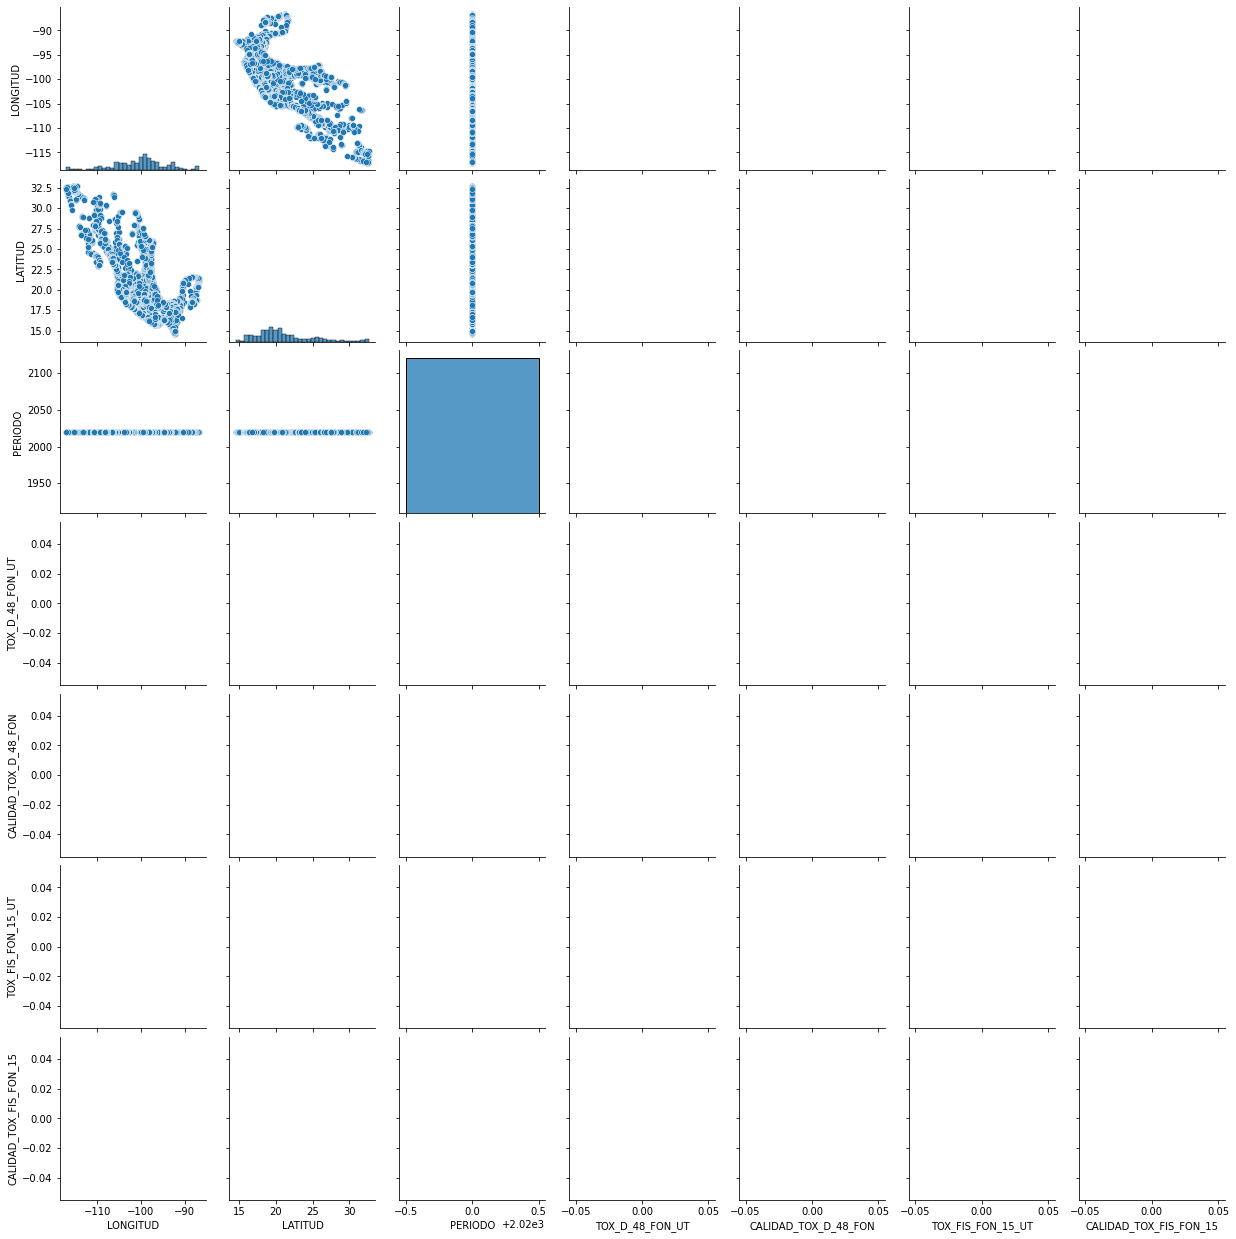

-------------------------------------


In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Visualización exploratoria 1. Aguas superficiales

Visualiza_exploratorio(df_1)

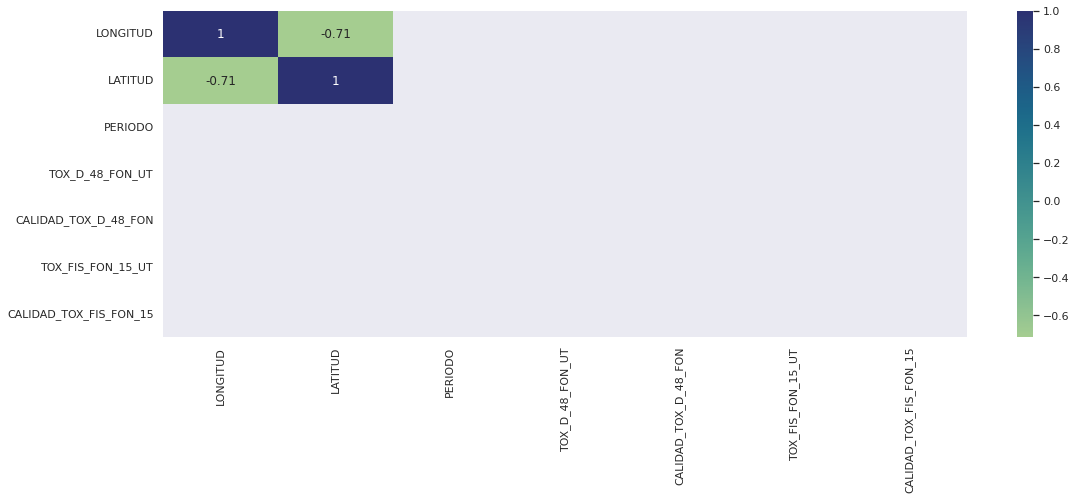

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Mapa de calor 1. Aguas superficiales

sns.set(rc={'figure.figsize':(18,6)})
Visualiza_mapa_de_calor(df_1)

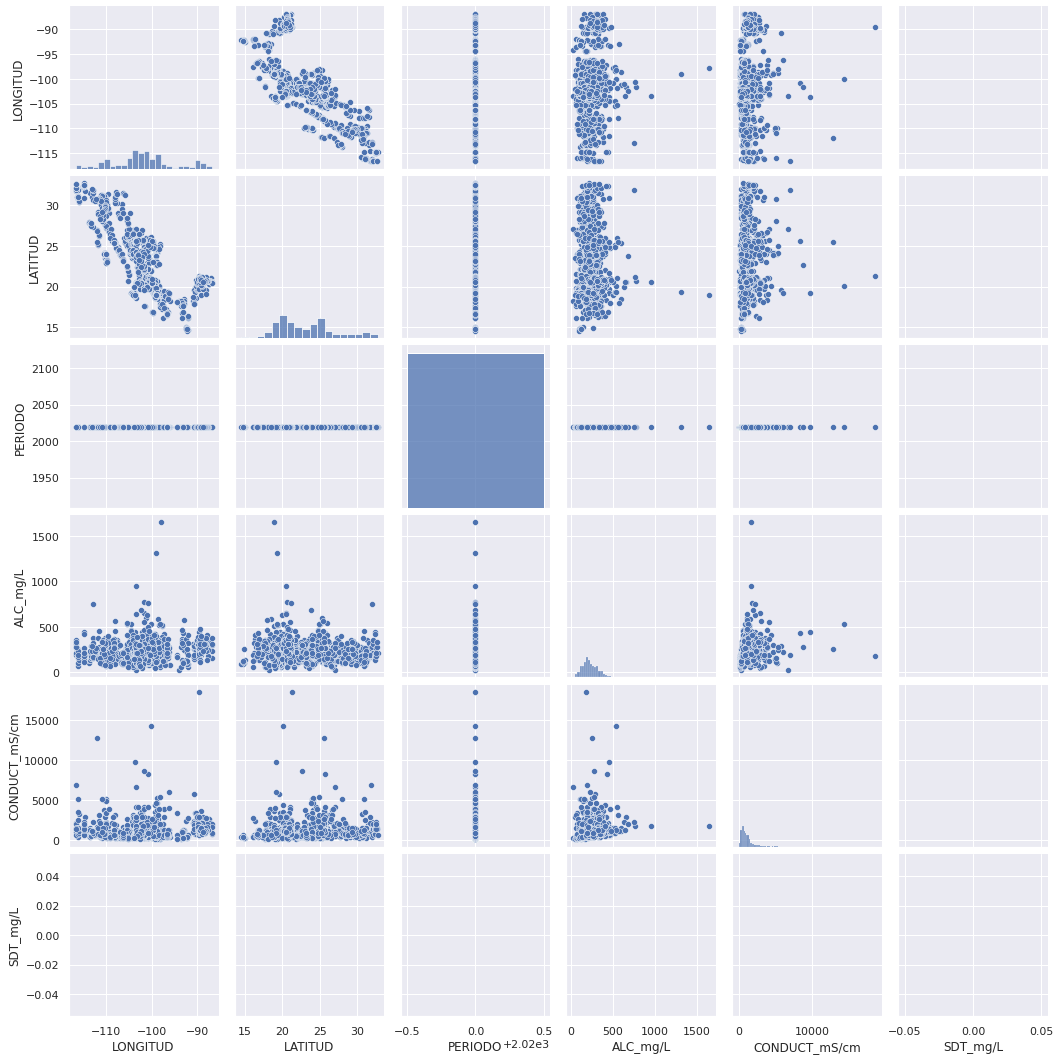

-------------------------------------


In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Visualización exploratoria 2. Aguas subterraneas

Visualiza_exploratorio(df_2)

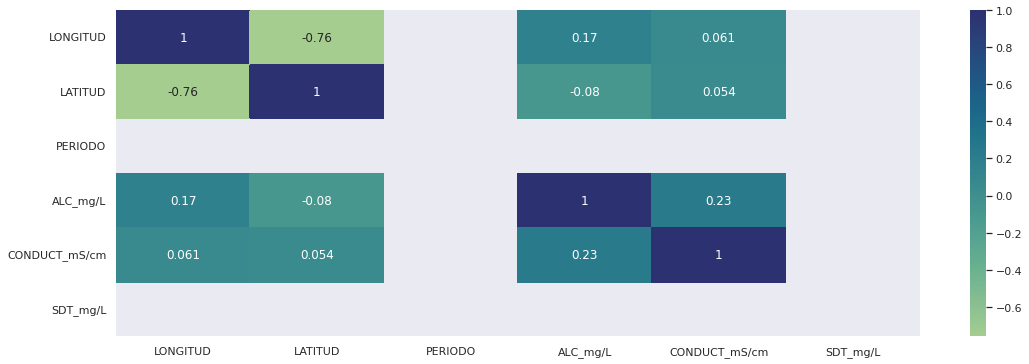

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Mapa de calor 2. Aguas subterraneas

sns.set(rc={'figure.figsize':(18,6)})
Visualiza_mapa_de_calor(df_2)

---

# Analizando información de 2. Aguas subterraneas

---

In [13]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Identificando y ordenando la información

#cat_AguSub= ['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO', 'ACUIFERO', 'SUBTIPO', 'CALIDAD_ALC', 'CALIDAD_CONDUC', 'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L', 'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL', 'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L', 'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR', 'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L', 'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES', 'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra', 'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR', 'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD', 'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN', 'CUMPLE_CON_FE']

#num_str_AguSub= ['ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L', 'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L', 'CR_TOT_mg/L', 'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L', 'FE_TOT_mg/L'] #'SDT_mg/L'

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

nombres_AguSub= ['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO', 'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L', 'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L', 'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L', 'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL', 'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L', 'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR', 'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L', 'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES', 'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra', 'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR', 'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD', 'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN', 'CUMPLE_CON_FE']

cat_bin_AguSub= ['CUMPLE_CON_ALC', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD', 'CUMPLE_CON_CF', 'CUMPLE_CON_COND', 'CUMPLE_CON_CR', 'CUMPLE_CON_DUR', 'CUMPLE_CON_FE', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_HG', 'CUMPLE_CON_MN', 'CUMPLE_CON_NO3', 'CUMPLE_CON_PB', 'CUMPLE_CON_SDT_ra', 'CUMPLE_CON_SDT_salin']

num_AguSub= ['ALC_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L', 'COLI_FEC_NMP/100_mL', 'CONDUCT_mS/cm', 'CR_TOT_mg/L', 'DUR_mg/L', 'FE_TOT_mg/L', 'FLUORUROS_mg/L', 'HG_TOT_mg/L', 'MN_TOT_mg/L', 'N_NO3_mg/L', 'PB_TOT_mg/L', 'SDT_M_mg/L'] #, 'SDT_mg/L'

cat_ord_AguSub= ['CALIDAD_ALC', 'CALIDAD_AS', 'CALIDAD_CD', 'CALIDAD_COLI_FEC', 'CALIDAD_CONDUC', 'CALIDAD_CR', 'CALIDAD_DUR', 'CALIDAD_FE', 'CALIDAD_FLUO', 'CALIDAD_HG', 'CALIDAD_MN', 'CALIDAD_N_NO3', 'CALIDAD_PB', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin']

cat_nom_AguSub= ['ACUIFERO', 'CLAVE', 'CONTAMINANTES', 'ESTADO', 'LATITUD', 'LONGITUD', 'MUNICIPIO', 'ORGANISMO_DE_CUENCA', 'PERIODO', 'SEMAFORO', 'SITIO', 'SUBTIPO']

geo_AguSub= ['LATITUD', 'LONGITUD']

In [14]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Búscando datos nulos

df_2_= df_2.copy() # Hacemos una copia del data frame original
df_2_['Conteo']= 1 # Agregando columna con valor 1 para contar renglones
Busca_Nulos(df_2_) # Llámamos a función que busca nulos en el DF

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
print('-----------------Agrupando varible por opciones contenidas----------------\n')
print('Variable: SDT_mg/L')
print(df_2_.groupby(['SDT_mg/L']).count())
print('arr:' ,df_2_['SDT_mg/L'].to_numpy())
# No se encuentra información, por lo tanto se elimina la columna SDT_mg/L
df_2_= df_2_.drop(axis=1, columns='SDT_mg/L') # Borrando columna

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
print('\n- - - - - - - - - - - - - - - - - - - -\n')
print('Variable: CONTAMINANTES')
df_group= df_2_[['CONTAMINANTES', 'Conteo']]
print(df_group.groupby(['CONTAMINANTES']).count())
df_2_['CONTAMINANTES']= df_2_['CONTAMINANTES'].replace(['SIN DATOS','N/A', 0, '', np.nan], 'Sin_contaminantes_analizados') # Se debe cambiar a binaria con contaminantes del analisis o sisn contaminantes del analisis
# Remplazando datos

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Borrando filas con valores nulos
df_2_= Busca_Nulos_(df_2_, 'delete')


-----------------------Búscando nulos en data frame-----------------------

El data frame SÍ tiene nulos
Se encuentran	 4 	nulos en la columna:  ALC_mg/L
Se encuentran	 4 	nulos en la columna:  CALIDAD_ALC
Se encuentran	 6 	nulos en la columna:  CONDUCT_mS/cm
Se encuentran	 6 	nulos en la columna:  CALIDAD_CONDUC
Se encuentran	 1068 	nulos en la columna:  SDT_mg/L
Se encuentran	 2 	nulos en la columna:  SDT_M_mg/L
Se encuentran	 2 	nulos en la columna:  CALIDAD_SDT_ra
Se encuentran	 2 	nulos en la columna:  CALIDAD_SDT_salin
Se encuentran	 1 	nulos en la columna:  DUR_mg/L
Se encuentran	 1 	nulos en la columna:  CALIDAD_DUR
Se encuentran	 1 	nulos en la columna:  N_NO3_mg/L
Se encuentran	 1 	nulos en la columna:  CALIDAD_N_NO3
Se encuentran	 434 	nulos en la columna:  CONTAMINANTES

-----------------------------Fin de la función----------------------------

-----------------Agrupando varible por opciones contenidas----------------

Variable: SDT_mg/L
Empty DataFrame
Columns: [CLAVE, S

In [15]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Remplazando datos de variables categóricas

# posibles usos de agua, se debe entender la contaminación 
# índice de potabilidad
# Kmeans categorización de grupos que se parezcan mucho o que no se parezcan nada
# Primer análisis con las calidades (calificaciones). No meter las calidades junto con las variables que las definen.
# 

nom_CALIDAD_COLI_FEC= ['Potable - Excelente', 'Buena calidad', 'Aceptable', 'Contaminada', 'Fuertemente contaminada']
nom_CALIDAD_SDT_ra= ['Excelente para riego', 'Cultivos sensibles', 'Cultivos con manejo especial', 'Cultivos tolerantes', 'Indeseable para riego']
nom_CALIDAD_CONDUC= ['Excelente para riego', 'Buena para riego', 'Permisible para riego', 'Dudosa para riego', 'Indeseable para riego']
nom_CALIDAD_ALC= ['Baja', 'Media', 'Alta', 'Indeseable', 'Indeseable como FAAP']
nom_CALIDAD_SDT_salin= ['Potable - Dulce', 'Ligeramente salobres', 'Salobres', 'Salinas']
nom_CALIDAD_FLUO= ['Potable - Optima', 'Media', 'Baja', 'Alta']
nom_CALIDAD_DUR= ['Potable - Suave', 'Potable - Moderadamente suave', 'Potable - Dura', 'Muy dura e indeseable usos industrial y domestico']
nom_CALIDAD_CD= ['Potable - Excelente', 'Apta como FAAP', 'No apta como FAAP']
nom_CALIDAD_AS= ['Potable - Excelente', 'Apta como FAAP', 'No apta como FAAP']
nom_CALIDAD_N_NO3= ['Potable - Excelente', 'Potable - Buena calidad', 'No apta como FAAP']
nom_CALIDAD_MN= ['Potable - Excelente', 'Sin efectos en la salud - Puede dar color al agua', 'Puede afectar la salud']
nom_CALIDAD_CR= ['Potable - Excelente', 'No apta como FAAP']
nom_CALIDAD_PB= ['Potable - Excelente', 'No apta como FAAP']
nom_CALIDAD_HG= ['Potable - Excelente', 'No apta como FAAP']
nom_CALIDAD_FE= ['Potable - Excelente', 'Sin efectos en la salud - Puede dar color al agua']

i= 0
for i in range(5):
  index= i+1
  df_2_['CALIDAD_SDT_ra']= df_2_['CALIDAD_SDT_ra'].replace([nom_CALIDAD_SDT_ra[i]], index)
  df_2_['CALIDAD_COLI_FEC']= df_2_['CALIDAD_COLI_FEC'].replace([nom_CALIDAD_COLI_FEC[i]], index)
  df_2_['CALIDAD_CONDUC']= df_2_['CALIDAD_CONDUC'].replace([nom_CALIDAD_CONDUC[i]], index)
  df_2_['CALIDAD_ALC']= df_2_['CALIDAD_ALC'].replace([nom_CALIDAD_ALC[i]], index)
  if i<4:
    df_2_['CALIDAD_SDT_salin']= df_2_['CALIDAD_SDT_salin'].replace([nom_CALIDAD_SDT_salin[i]], index)
    df_2_['CALIDAD_FLUO']= df_2_['CALIDAD_FLUO'].replace([nom_CALIDAD_FLUO[i]], index)
    df_2_['CALIDAD_DUR']= df_2_['CALIDAD_DUR'].replace([nom_CALIDAD_DUR[i]], index)
  if i<3:
    df_2_['CALIDAD_CD']= df_2_['CALIDAD_CD'].replace([nom_CALIDAD_CD[i]], index)
    df_2_['CALIDAD_AS']= df_2_['CALIDAD_AS'].replace([nom_CALIDAD_AS[i]], index)
    df_2_['CALIDAD_N_NO3']= df_2_['CALIDAD_N_NO3'].replace([nom_CALIDAD_N_NO3[i]], index)
    df_2_['CALIDAD_MN']= df_2_['CALIDAD_MN'].replace([nom_CALIDAD_MN[i]], index)
  if i<2:
    df_2_['CALIDAD_CR']= df_2_['CALIDAD_CR'].replace([nom_CALIDAD_CR[i]], index)
    df_2_['CALIDAD_PB']= df_2_['CALIDAD_PB'].replace([nom_CALIDAD_PB[i]], index)
    df_2_['CALIDAD_HG']= df_2_['CALIDAD_HG'].replace([nom_CALIDAD_HG[i]], index)
    df_2_['CALIDAD_FE']= df_2_['CALIDAD_FE'].replace([nom_CALIDAD_FE[i]], index)

df_print= df_2_[cat_ord_AguSub].copy()
print('\n-------------------Comprobando información remplazada---------------------\n')
print('Valores como string \n', df_print.describe())

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Remplazando valores de string por datos númericos
print('\n------------Remplazando valores de string en datos númericos--------------\n')
print('Valores como string \n', df_2_[num_AguSub].info())

for name in num_AguSub:
  df_2_[name]= df_2_[name].astype('str')
  df_2_[name]= df_2_[name].str.replace('<25','25') 
  df_2_[name]= df_2_[name].str.replace('<0.2','0.2') 
  df_2_[name]= df_2_[name].str.replace('<20','20') 
  df_2_[name]= df_2_[name].str.replace('<1.1','1.1')
  df_2_[name]= df_2_[name].str.replace('<0.02','0.02') 
  df_2_[name]= df_2_[name].str.replace('<0.01','0.01') 
  df_2_[name]= df_2_[name].str.replace('<0.003','0.003')
  df_2_[name]= df_2_[name].str.replace('<0.005','0.004') 
  df_2_[name]= df_2_[name].str.replace('<0.0005','0.0004') 
  df_2_[name]= df_2_[name].str.replace('<0.0015','0.0015') 
  df_2_[name]= df_2_[name].str.replace('<0.025','0.025')  
  df_2_[name]= df_2_[name].astype('float')

df_print= df_2_[num_AguSub].copy()
print('\n------------Remplazando valores de string en datos númericos--------------\n')
print('Valores como string \n', df_print.describe())




-------------------Comprobando información remplazada---------------------

Valores como string 
        CALIDAD_ALC  \
count  1054.000000   
mean      2.889943   
std       0.683014   
min       1.000000   
25%       3.000000   
50%       3.000000   
75%       3.000000   
max       5.000000   

        CALIDAD_AS  \
count  1054.000000   
mean      1.354839   
std       0.683054   
min       1.000000   
25%       1.000000   
50%       1.000000   
75%       1.000000   
max       3.000000   

        CALIDAD_CD  \
count  1054.000000   
mean      1.003795   
std       0.087080   
min       1.000000   
25%       1.000000   
50%       1.000000   
75%       1.000000   
max       3.000000   

       CALIDAD_COLI_FEC  \
count       1054.000000   
mean           1.490512   
std            0.882135   
min            1.000000   
25%            1.000000   
50%            1.000000   
75%            2.000000   
max            5.000000   

       CALIDAD_CONDUC  \
count     1054.000000   
mean      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykern


------------Remplazando valores de string en datos númericos--------------

Valores como string 
           ALC_mg/L  \
count  1054.000000   
mean    234.695266   
std     111.147849   
min      26.640000   
25%     164.257500   
50%     215.825000   
75%     292.930000   
max    1650.000000   

       AS_TOT_mg/L  \
count  1054.000000   
mean      0.019504   
std       0.035051   
min       0.010000   
25%       0.010000   
50%       0.010000   
75%       0.010000   
max       0.452200   

       CD_TOT_mg/L  \
count   1054.00000   
mean       0.00303   
std        0.00090   
min        0.00300   
25%        0.00300   
50%        0.00300   
75%        0.00300   
max        0.03211   

       COLI_FEC_NMP/100_mL  \
count          1054.000000   
mean            359.734156   
std            2065.705773   
min               1.100000   
25%               1.100000   
50%               1.100000   
75%              10.750000   
max           24196.000000   

       CONDUCT_mS/cm  \
count    

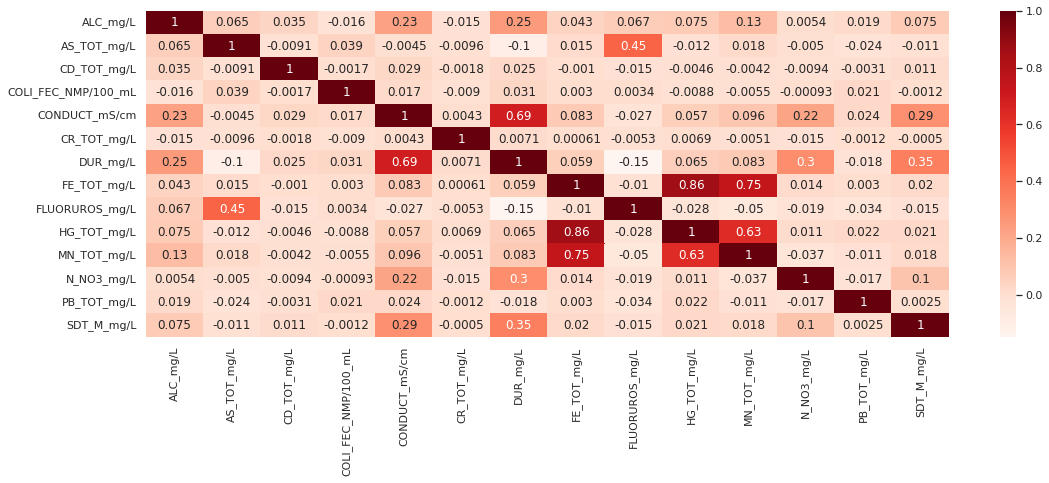

In [20]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Mapa de calor 2. Aguas subterraneas

sns.set(rc={'figure.figsize':(18,6)})
Visualiza_mapa_de_calor(df_2_[num_AguSub], 'Reds')
# Arsenico con fluoruros



In [ ]:
Visualiza_exploratorio(df_2_num_AguSub)
# criterio experto de clasificación de calidad

---

# Siguiente sección

---

---

# Siguiente sección

---

---

# Siguiente sección

---

---

# Siguiente sección

---

5. Realiza el conteo de las variables categóricas

---

Se realiza una revisión de la **descripción de la BD** con la que identificamos las variables Categóricas y Numéricas:

* **X1**: Monto del crédito otorgado (dólar NT), incluye tanto el crédito de consumo individual como su crédito familiar (complementario).
* X2: Sexo (1 = hombre; 2 = mujer).
* X3: Educación (1 = posgrado; 2 = universidad; 3 = secundaria; 4 = otros).
* X4: Estado civil (1 = casado; 2 = soltero; 3 = otros).
* X5: Edad (año).

X6 - X11: Historial de pagos pasados a partir del seguimiento de los registros de pagos mensuales pasados ​​de abril a septiembre del 2005.
* X6 = Estado de pago en septiembre de 2005.
* X7 = El estado de pago en agosto de 2005.
* X8 = El estado de pago en julio de 2005.
* X9 = El estado de pago en junio de 2005.
* X10 = El estado de pago en mayo de 2005.
* X11 = Estado de amortización en abril de 2005 (escala de medición del estado de amortización es: -1 = pagar debidamente; 1 = retraso en el pago de un mes; 2 = retraso en el pago de dos meses; . . .; 8 = retraso en el pago de ocho meses; 9 = retraso en el pago de nueve meses o más).

X12-X17: Importe del estado de cuenta (dólar NT).
* **X12** = monto del estado de cuenta en septiembre de 2005.
* **X13** = monto del estado de cuenta en agosto de 2005.
* **X17** = monto del estado de cuenta en abril de 2005.

X18-X23: Monto del pago anterior (dólar NT).
* **X18** = monto pagado en septiembre de 2005.
* **X19** = monto pagado en agosto de 2005.
* **X20** = monto pagado en julio de 2005.
* **X21** = monto pagado en junio de 2005.
* **X22** = monto pagado en mayo de 2005.
* **X23** = monto pagado en abril de 2005.

---

## Variables categóricas:

X3, X4, X6, X7, X8, X9, x10, X11

## Variables binarias:

X2, Y

## Variables numéricas

X1, X5, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# 5. Realiza el conteo de las variables categóricas

VarCat= ['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'Y']

for name in VarCat:
  #df_count_cat= data_frame[name].value_counts()
  #print('\n- - - - - - - - - - - - - - - - - - - - - \ndf group by:',name ,'\n')
  #print(df_count_cat)
  df_count_cat= pd.DataFrame({name:data_frame[name] ,'Conteo':1 })
  df_count_cat= df_count_cat.groupby(name)
  print('\n- - - - - - - - - - - - - - - - - - - - - \ndf group by:',name ,'\n',df_count_cat.count())


- - - - - - - - - - - - - - - - - - - - - 
df group by: X2 
      Conteo
X2         
1.0   11863
2.0   18095

- - - - - - - - - - - - - - - - - - - - - 
df group by: X3 
      Conteo
X3         
0.0      14
1.0   10572
2.0   14009
3.0    4909
4.0     123
5.0     280
6.0      51

- - - - - - - - - - - - - - - - - - - - - 
df group by: X4 
      Conteo
X4         
0.0      54
1.0   13643
2.0   15939
3.0     322

- - - - - - - - - - - - - - - - - - - - - 
df group by: X6 
       Conteo
X6          
-2.0    2758
-1.0    5680
 0.0   14717
 1.0    3678
 2.0    2662
 3.0     322
 4.0      76
 5.0      26
 6.0      11
 7.0       9
 8.0      19

- - - - - - - - - - - - - - - - - - - - - 
df group by: X7 
       Conteo
X7          
-2.0    3778
-1.0    6042
 0.0   15709
 1.0      28
 2.0    3918
 3.0     326
 4.0      99
 5.0      25
 6.0      12
 7.0      20
 8.0       1

- - - - - - - - - - - - - - - - - - - - - 
df group by: X8 
       Conteo
X8          
-2.0    4082
-1.0    5930
 0.0   157

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# 6. Escala los datos, si consideras necesario

VarNum= ['X1', 'X5', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']

print('\n- - - - - - - - - - - - - - - - - - - - - \n') # Escalando las variables númericas
df_z_scaled = data_frame.copy() 
df_z_scaled[VarNum] = (df_z_scaled[VarNum] - df_z_scaled[VarNum].mean()) / df_z_scaled[VarNum].std()     
display(df_z_scaled)
data_frame_proc= df_z_scaled


- - - - - - - - - - - - - - - - - - - - - 



,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,-1.137344,2.0,2.0,1.0,-1.246261,2.0,2.0,-1.0,-1.0,-2.0,...,-0.672408,-0.663020,-0.652703,-0.341884,-0.227130,-0.296778,-0.308102,-0.314119,-0.293480,1.0
2,-0.366555,2.0,2.0,2.0,-1.029207,-1.0,2.0,0.0,0.0,0.0,...,-0.621573,-0.606219,-0.597973,-0.341884,-0.213642,-0.240015,-0.244311,-0.314119,-0.181051,1.0
3,-0.597792,2.0,2.0,2.0,-0.160993,0.0,0.0,0.0,0.0,0.0,...,-0.449755,-0.417270,-0.391739,-0.250266,-0.191955,-0.240015,-0.244311,-0.248698,-0.012407,0.0
4,-0.906107,2.0,2.0,1.0,0.164587,0.0,0.0,0.0,0.0,0.0,...,-0.232508,-0.186926,-0.156806,-0.221175,-0.169445,-0.228663,-0.237932,-0.244184,-0.237265,0.0
5,-0.906107,1.0,2.0,1.0,2.335122,-1.0,0.0,-1.0,0.0,0.0,...,-0.347074,-0.348254,-0.331621,-0.221175,1.333939,0.270845,0.266016,-0.269044,-0.255310,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,0.404233,1.0,3.0,1.0,0.381640,0.0,0.0,0.0,0.0,0.0,...,0.694863,-0.149475,-0.384505,0.171128,0.610440,-0.012796,-0.113731,0.012987,-0.237265,0.0
29997,-0.135319,1.0,3.0,2.0,0.815747,-1.0,-1.0,-1.0,-1.0,0.0,...,-0.532906,-0.577695,-0.652703,-0.231013,-0.104082,0.213969,-0.299873,-0.314119,-0.293480,0.0
29998,-1.060265,1.0,2.0,2.0,0.164587,4.0,3.0,2.0,-1.0,0.0,...,-0.348038,-0.324646,-0.327828,-0.341884,-0.257014,0.951992,-0.040180,-0.183276,-0.119215,1.0
29999,-0.674871,1.0,3.0,1.0,0.598694,1.0,-1.0,0.0,0.0,0.0,...,0.147514,-0.468120,0.168741,4.842552,-0.109157,-0.229912,-0.185241,3.150852,-0.192069,1.0


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,2.43,1.31,1.02,0.96,0.94,0.93,0.88,0.85,0.84,0.51,0.27,0.2,0.16,0.15
Proportion of variance,0.42,0.12,0.07,0.07,0.06,0.06,0.06,0.05,0.05,0.02,0.01,0.0,0.00,0.00
Cumulative proportion,0.42,0.55,0.62,0.69,0.75,0.81,0.87,0.92,0.97,0.99,0.99,1.0,1.00,1.00



- - - - - - - - - - - - - - - - - - - - - 

Visualizando la gráfica de Scree plot:



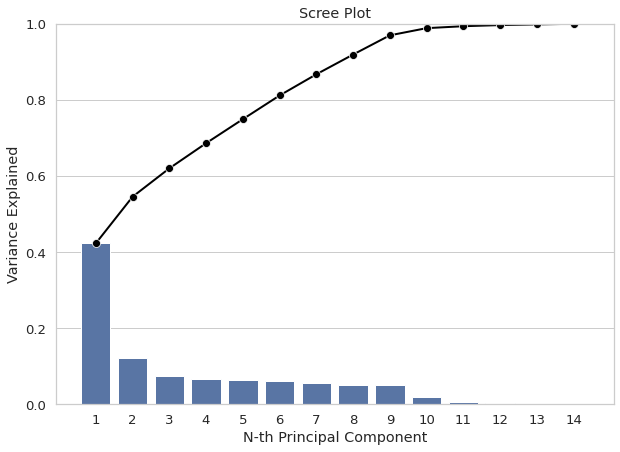


- - - - - - - - - - - - - - - - - - - - - 

Aportación de cada variable númerica a los primeros 6 componentes principales


,PC1,PC2,PC3,PC4,PC5,PC6
X1,0.165507,0.300709,-0.378575,-0.200103,0.035312,-0.078883
X5,0.032789,0.071906,-0.869471,0.338990,-0.039760,0.071461
X12,0.372446,-0.190793,-0.034207,-0.063899,0.041391,-0.043987
X13,0.383253,-0.174644,-0.001814,0.007629,0.083164,-0.028824
X14,0.388264,-0.126883,0.034747,0.060528,0.113790,0.099239
X15,0.391557,-0.120403,0.034073,0.074774,0.028378,0.014527
X16,0.388505,-0.105928,0.033882,0.039553,-0.106756,-0.099290
X17,0.380672,-0.094157,0.018489,-0.070616,-0.164986,0.069272
X18,0.135120,0.383194,0.173845,0.362055,0.225652,0.040574
X19,0.116768,0.408391,0.200925,0.345745,0.148714,0.408361


In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# 7. Reduce las dimensiones con PCA, si consideras necesario.
#   7.1 Indica la varianza de los datos explicada por cada componente seleccionado.
#       Para actividades de exploración de los datos la varianza > 70%
#   7.2 Indica la importancia de las variables en cada componente.

import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# - - - - - - - - - - - - - - - - - - - - - - - - - - - 
#
# Se aplica PCA solo en las variables númericas
#
# - - - - - - - - - - - - - - - - - - - - - - - - - - - 
pcs = PCA()
pcs.fit(data_frame_proc[VarNum])
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                              'Proportion of variance': pcs.explained_variance_ratio_,
                              'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
display(round(pcsSummary_df,2))


print('\n- - - - - - - - - - - - - - - - - - - - - \n') # Determinando los componentes principales
print('Visualizando la gráfica de Scree plot:\n',)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - 
def Grafica_scree_plot(pcs):
  PC_components = np.arange(pcs.n_components_) + 1

  _ = sns.set(style = 'whitegrid', font_scale = 1.2)

  fig, ax = plt.subplots(figsize=(10, 7))

  _ = sns.barplot(x = PC_components, 
                  y = pcs.explained_variance_ratio_, 
                  color = 'b')

  _ = sns.lineplot(x = PC_components-1, 
                  y = np.cumsum(pcs.explained_variance_ratio_), 
                  color = 'black', 
                  linestyle = '-', 
                  linewidth = 2, 
                  marker = 'o', 
                  markersize = 8)

  plt.title('Scree Plot')
  plt.xlabel('N-th Principal Component')
  plt.ylabel('Variance Explained')
  plt.ylim(0, 1)
  plt.show()
  return None

# - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Grafica_scree_plot(pcs)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
print('\n- - - - - - - - - - - - - - - - - - - - - \n')
print('Aportación de cada variable númerica a los primeros 6 componentes principales')
pcsComponents_ = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = VarNum)
pcsComponents_.iloc[:,:6]

A partior de la proporción acumulada y la gráfica Scree plot (en dónde dobla el codo la gráfica), podemos concluir que con los primeros ***9 componentes*** se capta el ***97%*** de la variación total de las variables del data frame.

---

Por otro lado, para responder el ejercicio, con los primeros ***5 componentes*** se logra explicar más del ***70%*** de la varianza.

---

De la tabla de aportación de cada variable númerica a los primeros 6 componentes principales, podemos observar que las diferentes variables aportan más o menos a la varianza de cada componente. Nos quedamos con las variables que están por encima de 0.4 o -0.4 como las variables que más aportan a cada componente.

---

**CONCLUSIÓN:**

Del análisis de PCA podemos decir que para quedarnos con una captación mayor al 70% de varianza, será necesario quedarnos con los primeros 6 componentes principales. Al realizar la revisión de las variables que más contribuyen a la variación de cada componente vemos que en el caso del PC1 las variables que más aportan a la varianza son "amount of bill statement" (X12 a X17). En el caso de PC2 las variables que más aportan a la varianza son "Amount of previous payment" (X18 a X23). En el caso del componente PC3 la variable que explica su varianza es "Education" (X3), para la PC4 es X22, en PC5 es X21 y X23 y finalmente para el componente principal PC6 es X19, X21 y X22. 


In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# 9. Realiza la visualización de los datos usando por lo menos 3 gráficos que 
#    consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, 
#    pie chart, pairplot, bar chart, etc.

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
def Visualiza_hist(datos_, bins_): # Función que sirve para gráficar columnas del data frame
  nombres= datos_.columns
  n= len(nombres)
  print('-------------------------------------\n# de gráficos:',n)
  nr= int(n/5)+1
  round(nr,0)
  nc = int(n/nr)
  if nc== 0:
    nc= n
  else:
    if nr*nc<n:
      nc=nc+1
  print('Renglones:',nr,', columnas:',nc)  
  sns.set(rc={'figure.figsize':(nc*5,nr*5)})
  fig, axes = plt.subplots(nr,nc)
  plt.suptitle('Histogramas de los datos', y= 0.98, fontsize= 18, fontweight= "bold", 
               fontfamily= "serif", fontname= "Sans")
  k= 1
  for name in nombres:
    plt.subplot(nr,nc,k)  # Los nichos para cada histograma se numeran iniciando en 1.
    plt.hist(datos_[name], bins= bins_, color= 'green', density= True)
    plt.xlabel(name)
    plt.ylabel('Conteos')
    plt.title(name)
    plt.subplots_adjust(top=0.90)
    k= k+1
  plt.show()
  print('-------------------------------------')


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
def Visualiza_histA(datos_, bins_): # Función que sirve para gráficar columnas del data frame 
  nombres= datos_.columns
  k= 1
  for name in nombres:
    sns.displot(datos_[name], color='green', bins= bins_, kde=True) #creamos el gráfico en Seaborn
    plt.xlabel(name)
    plt.ylabel('Conteos')
    plt.title(name)
    k= k+1
  plt.show()
  print('-------------------------------------')

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
def Visualiza_exploratorio(datos_): # Función que gráfica de forma exploratoria el data frame
  sns.pairplot(data = datos_, palette= 'bright')
  plt.show()
  print('-------------------------------------')

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
def Visualiza_mapa_de_calor(datos_):
  sns.set(rc={'figure.figsize':(20,20)})
  sns.heatmap(datos_.corr(), annot= True, cmap= "crest")
  plt.show()

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
def Visualiza_boxplot(datos_, name_): # Función que gráfica boxplot
  sns.set(rc={'figure.figsize':(10,10)})
  plt.boxplot(datos_, labels= name_, showmeans=True)
  plt.show()

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
def Visualiza_pie(datos_): # Función que gráfica pie
  sns.set(rc={'figure.figsize':(10,10)})
  plt.pie(datos_)
  #plt.axis("equal")
  plt.show()

print('\n- - - - - - - - - - - - - - - - - - - - - \n')



- - - - - - - - - - - - - - - - - - - - - 



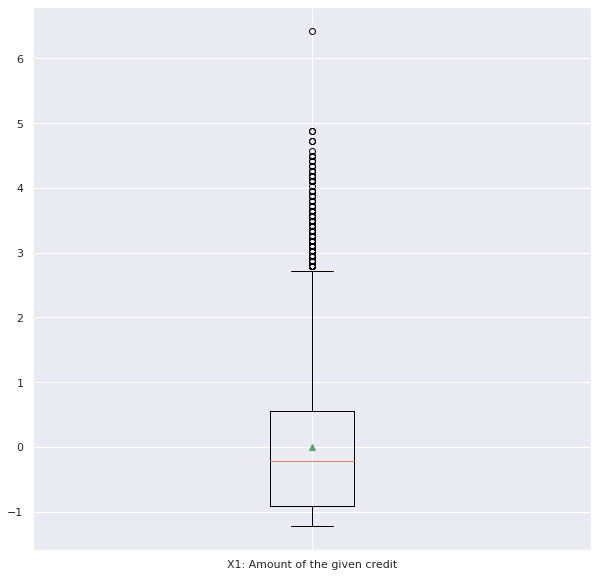

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Gráficando variables
Visualiza_boxplot(df_num['X1'], ['X1: Amount of the given credit'])

-------------------------------------
# de gráficos: 10
Renglones: 3 , columnas: 4


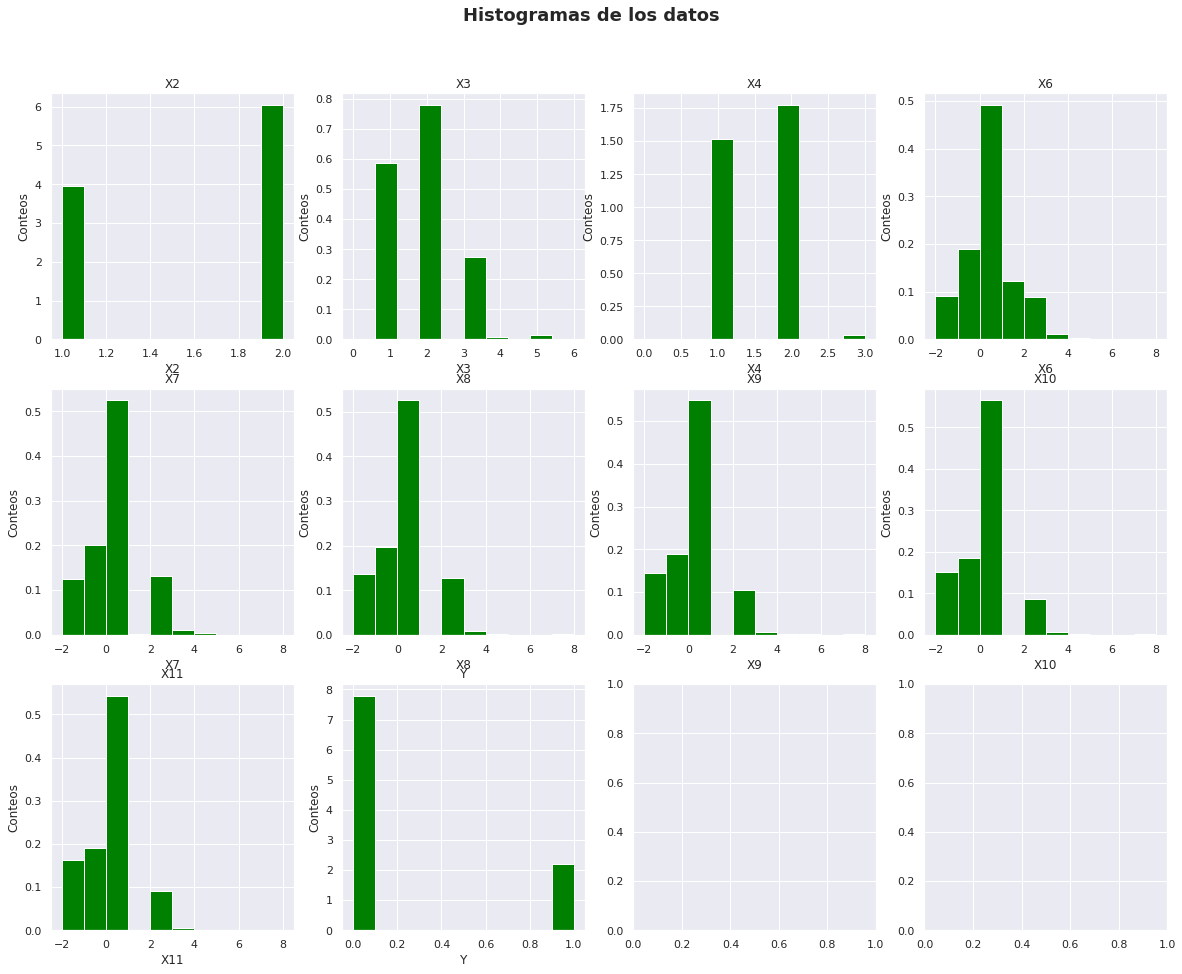

-------------------------------------


In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Gráficando variables 
df_num= data_frame_proc[VarNum]
df_cat= data_frame_proc[VarCat]

Visualiza_hist(df_cat,10)


- - - - - - - - - - - - - - - - - - - - - 



Text(0, 0.5, 'X3')

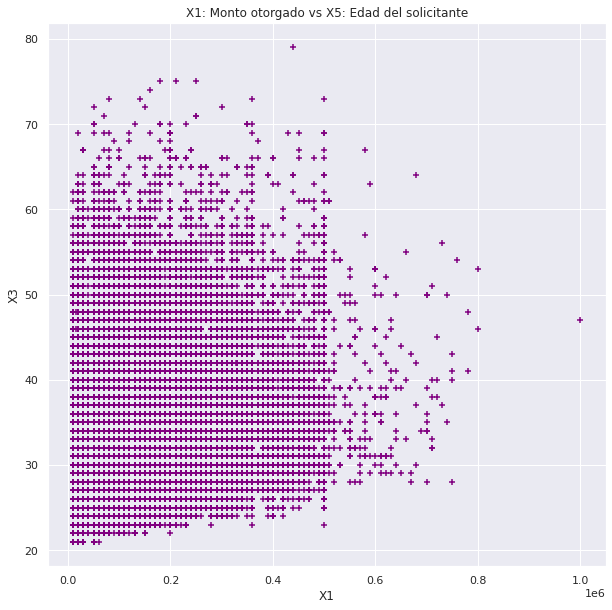

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Gráficando variables
print('\n- - - - - - - - - - - - - - - - - - - - - \n') # Mostrando scatterplot
y= df_sin_nulos['X5']
x= df_sin_nulos['X1']
plt.scatter(x, y, c= 'purple', marker= '+')
plt.title('X1: Monto otorgado vs X5: Edad del solicitante')
plt.xlabel('X1')
plt.ylabel('X3')

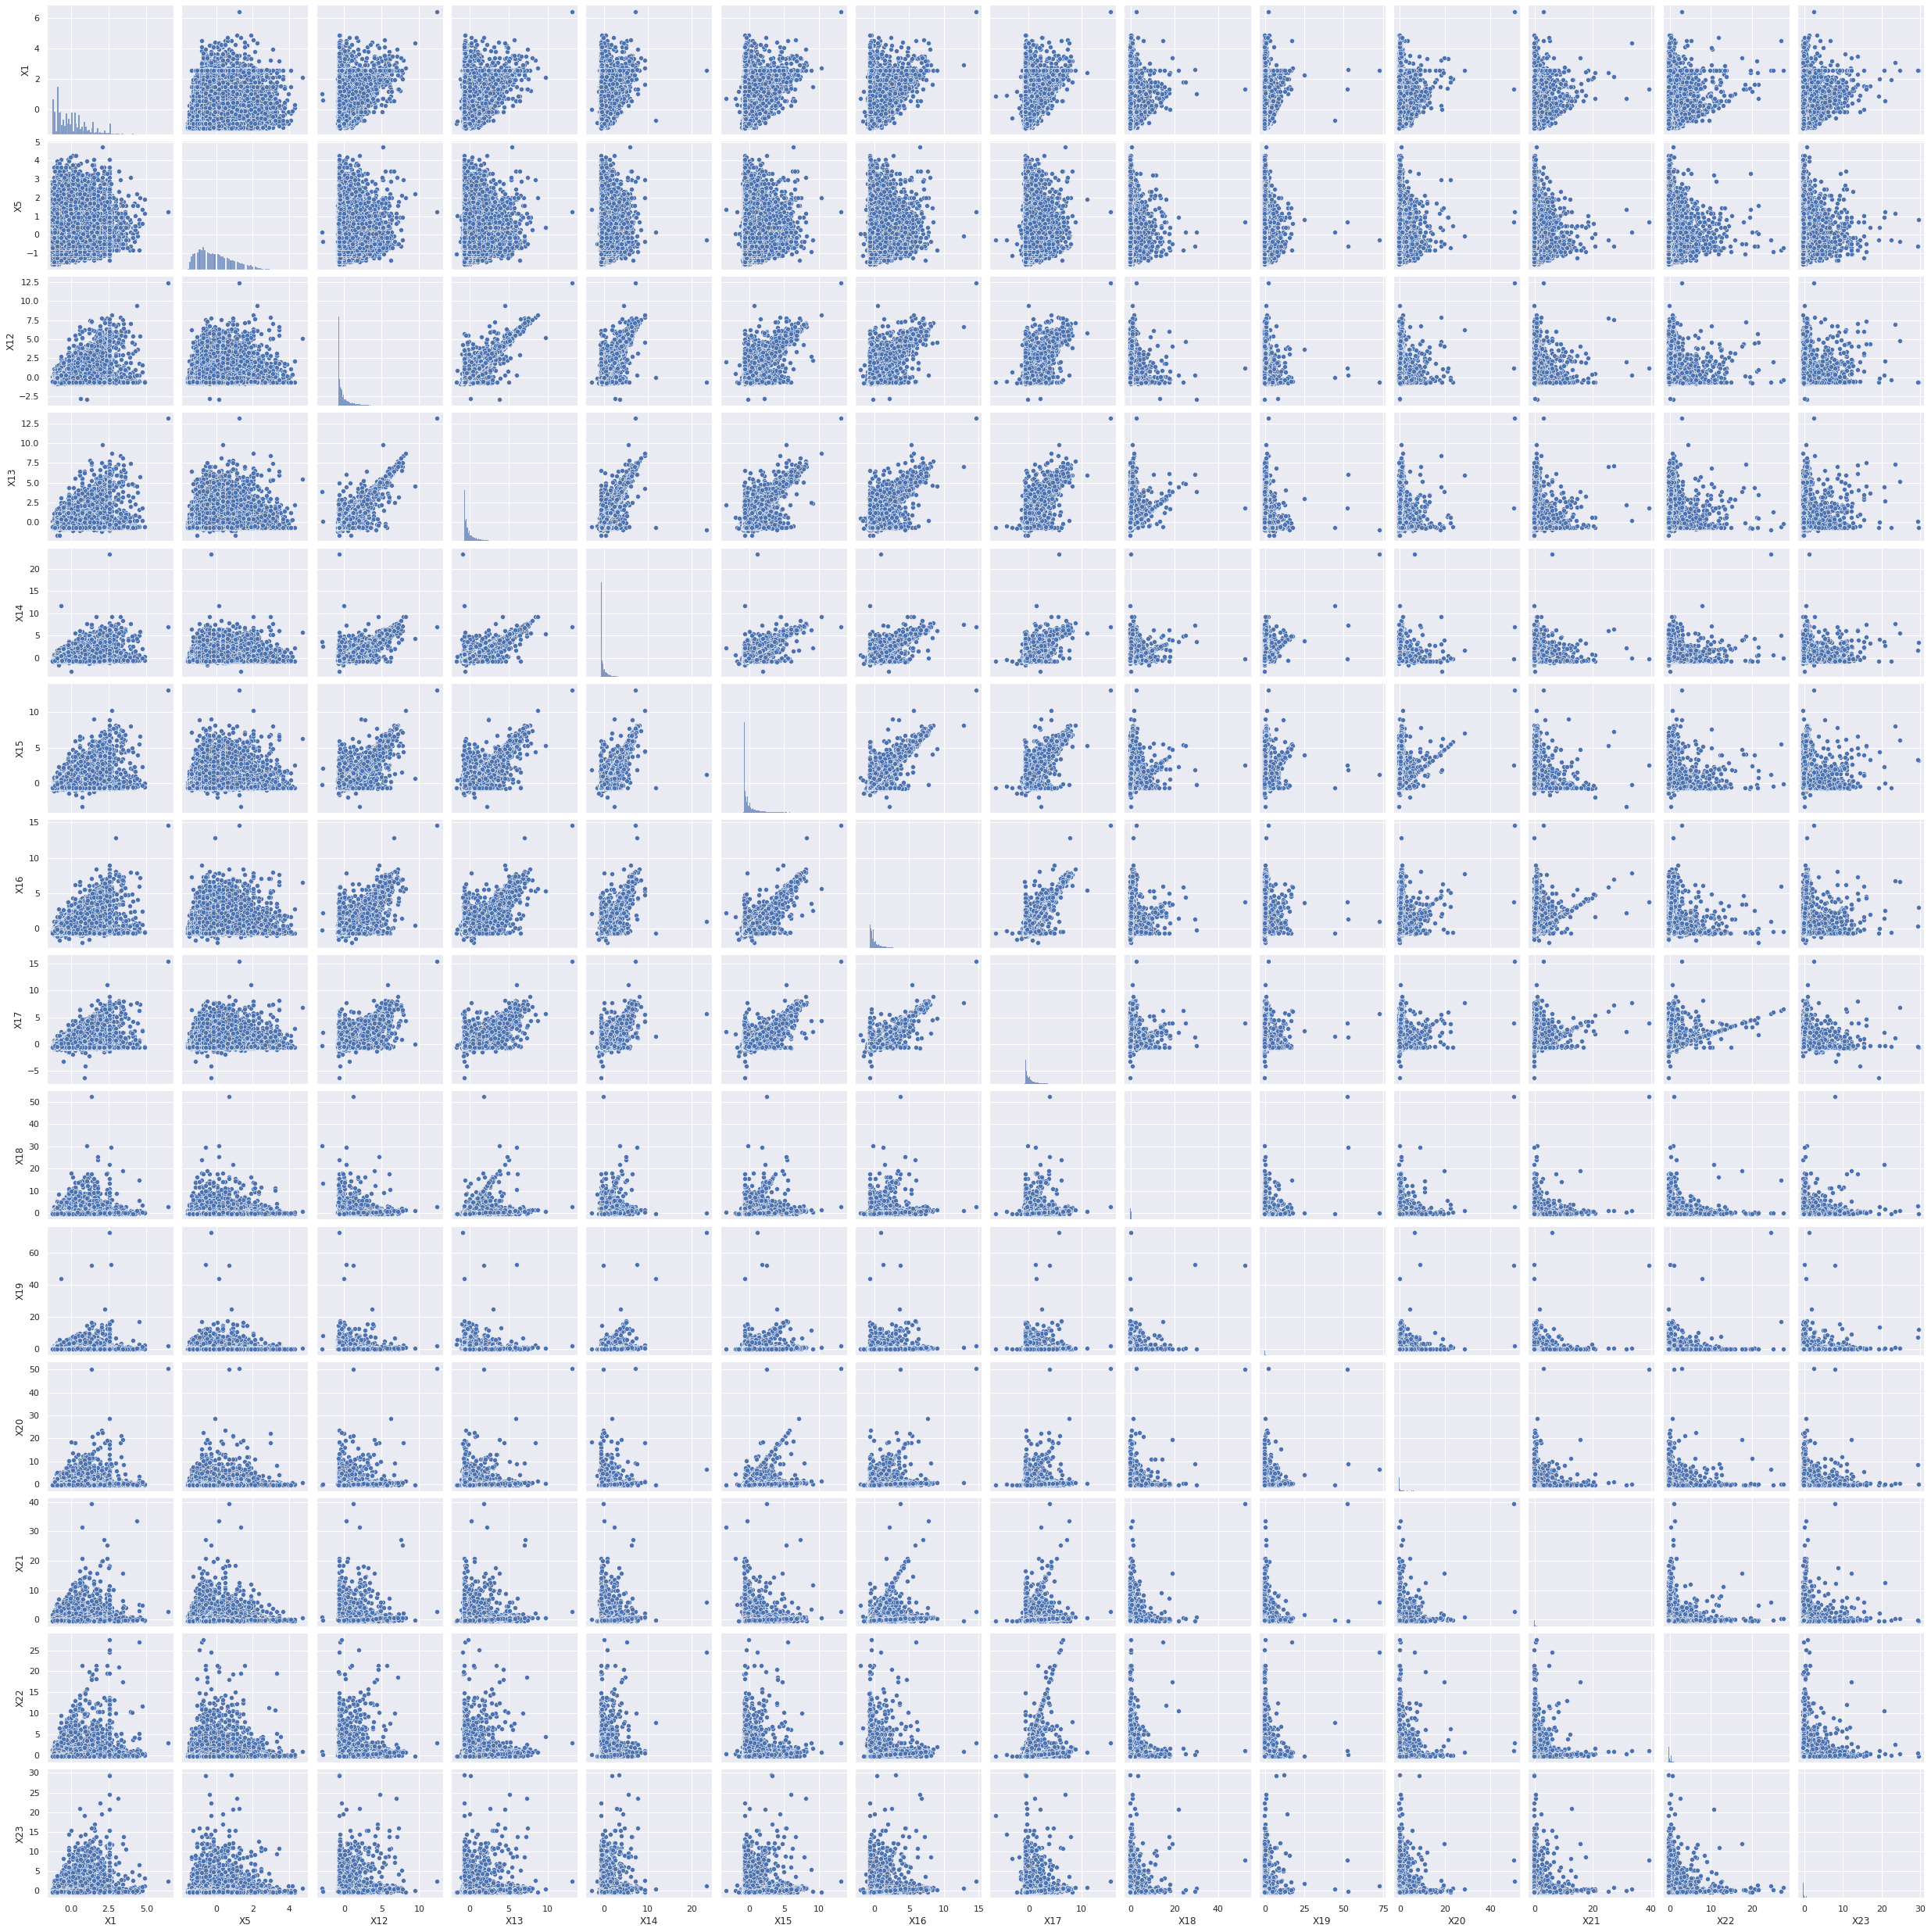

-------------------------------------


In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Gráficando variables
Visualiza_exploratorio(df_num)

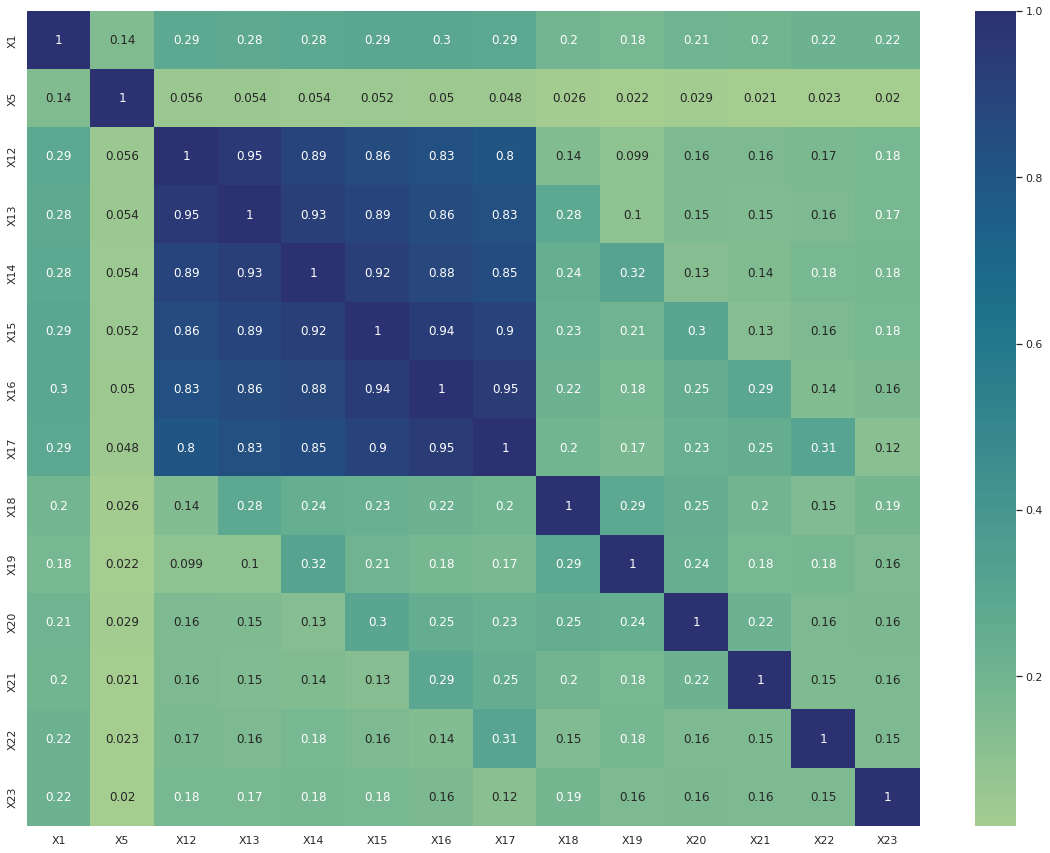

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Gráficando variables
Visualiza_mapa_de_calor(df_num)

---
## 10. Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.

1. En el caso de la gráfica de boxplot nos ayuda a poder entender de forma gráfica el comportamiento de los datos, su distribución, sus valores atípicos y en dónde se concentra la mayor cantidad de información. Es de mucha utilidad si se quiere visualizar valores de dispersión y distribución de las variables.

2. En el caso de los gráficos de barras presentados como histogramas son de ucha útilidad para poder agrupar los datos en categorías y de está manera poder entender la frecuencia de ocurrencia de las variables. En esté caso se utilizan en las variables categóricas para entender sui distribución.

3. En el gráfico de scatterplot mostrado se pueden observar relaciones entre dos variables definidas en cada eje, esto permite entender la distribución de los datos con base en los dos ejes coordenados. En el caso del ejemplo podemos observar como se distribuyen los montos otorgados con respecto a la edad del solicitante.

4. En el caso de la matriz de correlación se puede observar la relación existente entre las diferentes variables utilizadas, está gráfica sirve de mucho para poder entender que variables no tienen relación y cuales sí tienen relación con algúna otra.

5. La gráfica exploratoria nos gráfica la distribución existente entre todas las variables vs todas las variables del set de datos, para poder darnos una idea a alto nivel de la distribución de las relaciones. Tmbien ayuda a ver de manerá rápida las escalas que maneja la información y hace evidente la necesidad de normalización de los datos.

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - 
#

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
print(':\n',)
print(':\n',)

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
print(':\n',)
print(':\n',)

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
print(':\n',)
print(':\n',)

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
print(':\n',)
print(':\n',)

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
print(':\n',)
print(':\n',)

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
print(':\n',)
print(':\n',)

print('\n5- - - - - - - - - - - - - - - - - - - - - \n')

print('\n:',)
print('\n:',)
print('\n:',)